Загрузка файла с данными

In [6]:
#Установка библиотеки Kaggle
!pip install kaggle

In [7]:
from google.colab import files

# Загрузка файла kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [8]:
import os
import shutil

# Определяем пути источника и назначения
source_path = 'kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Создаем директорию назначения, если она не существует
os.makedirs(destination_dir, exist_ok=True)

# Перемещаем файл
shutil.move(source_path, destination_path)

# Устанавливаем права доступа
os.chmod(destination_path, 0o600)

In [9]:
# Kaggle API для загрузки датасета:
!kaggle datasets download -d gmudit/employer-data

Dataset URL: https://www.kaggle.com/datasets/gmudit/employer-data
License(s): MIT
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 391MB/s]


In [10]:
# Распаковка архива:
import zipfile

with zipfile.ZipFile('employer-data.zip', 'r') as zip_ref:
    zip_ref.extractall()

Вставка данных в датафрейм

In [11]:
import pandas as pd

df = pd.read_csv('Employers_data.csv')

# Просматриваем первые несколько строк датасета
print(df.head())

# Получаем общую информацию о датасете
print(df.info())

# Выводим статистические данные о числовых столбцах
print(df.describe())

   Employee_ID            Name  Age  Gender   Department  Job_Title  \
0            1    Merle Ingram   24  Female  Engineering   Engineer   
1            2      John Mayes   56    Male        Sales  Executive   
2            3    Carlos Wille   21    Male  Engineering     Intern   
3            4  Michael Bryant   30    Male      Finance    Analyst   
4            5   Paula Douglas   25  Female           HR    Analyst   

   Experience_Years Education_Level  Location  Salary  
0                 1          Master    Austin   90000  
1                33          Master   Seattle  195000  
2                 1        Bachelor  New York   35000  
3                 9        Bachelor  New York   75000  
4                 2          Master   Seattle   70000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null

Подключение/создание БД

In [12]:
import sqlite3

# Подключение к SQLite базе данных (или создание, если не существует)
conn = sqlite3.connect('employers.db')

Создание таблиц

In [13]:
cursor = conn.cursor()

# Создание таблицы "employees_common" (содержит общую информацию о сотруднике)
cursor.execute('''CREATE TABLE IF NOT EXISTS employees_common (
    employee_id INTEGER PRIMARY KEY,
    name VARCHAR(100) NOT NULL,
    gender VARCHAR(6) NOT NULL,
    age INTEGER NOT NULL,
    education_level VARCHAR(20) NOT NULL
)''')

# Создание таблицы "employees_job" (содержит информацию о работе сотрудника)
cursor.execute('''CREATE TABLE IF NOT EXISTS employees_job (
    employee_id INTEGER PRIMARY KEY,
    department VARCHAR(20) NOT NULL,
    job_title VARCHAR(20) NOT NULL,
    experience_years INTEGER,
    location VARCHAR(50),
    salary NUMERIC
)''')

conn.commit()

Заполнение таблиц

In [14]:
cursor = conn.cursor()

data_f = df[['Employee_ID', 'Name', 'Gender', 'Age', 'Education_Level']].values.tolist()
cursor.executemany("INSERT INTO employees_common (employee_id, name, gender, age, education_level) VALUES (?, ?, ?, ?, ?)", data_f)

conn.commit()

In [15]:
#Проверка вставленных строк

cursor = conn.cursor()

cursor.execute("SELECT * FROM employees_common")
employees_common = cursor.fetchmany(15) #выбираем первые 15
for employee in employees_common:
    print(employee)


(1, 'Merle Ingram', 'Female', 24, 'Master')
(2, 'John Mayes', 'Male', 56, 'Master')
(3, 'Carlos Wille', 'Male', 21, 'Bachelor')
(4, 'Michael Bryant', 'Male', 30, 'Bachelor')
(5, 'Paula Douglas', 'Female', 25, 'Master')
(6, 'Michael Irving', 'Male', 35, 'PhD')
(7, 'Marcelle Campbell', 'Female', 23, 'Bachelor')
(8, 'Glenda Leal', 'Female', 47, 'Master')
(9, 'Walter Williams', 'Male', 43, 'PhD')
(10, 'Vanessa Songer', 'Female', 23, 'Master')
(11, 'Caitlin Mayhugh', 'Female', 24, 'Master')
(12, 'Peter Paris', 'Male', 23, 'Master')
(13, 'Lionel Elsea', 'Male', 48, 'PhD')
(14, 'Alice Elvin', 'Female', 40, 'PhD')
(15, 'Carolyn Bell', 'Female', 59, 'PhD')


In [16]:
cursor = conn.cursor()

data_f = df[['Employee_ID', 'Department', 'Job_Title', 'Experience_Years', 'Location', 'Salary']].values.tolist()

cursor.executemany("INSERT INTO employees_job (employee_id, department, job_title, experience_years, location, salary) VALUES (?, ?, ?, ?, ?, ?)", data_f)

conn.commit()

In [17]:
#Проверка вставленных строк

cursor = conn.cursor()

cursor.execute("SELECT * FROM employees_job")
employees_job = cursor.fetchmany(15) #выбираем первые 15
for employee in employees_job:
    print(employee)

(1, 'Engineering', 'Engineer', 1, 'Austin', 90000)
(2, 'Sales', 'Executive', 33, 'Seattle', 195000)
(3, 'Engineering', 'Intern', 1, 'New York', 35000)
(4, 'Finance', 'Analyst', 9, 'New York', 75000)
(5, 'HR', 'Analyst', 2, 'Seattle', 70000)
(6, 'Finance', 'Manager', 8, 'New York', 125000)
(7, 'Marketing', 'Analyst', 2, 'San Francisco', 60000)
(8, 'Marketing', 'Manager', 24, 'San Francisco', 145000)
(9, 'Marketing', 'Manager', 16, 'San Francisco', 135000)
(10, 'Marketing', 'Analyst', 0, 'San Francisco', 70000)
(11, 'Product', 'Engineer', 1, 'New York', 90000)
(12, 'Product', 'Engineer', 0, 'Chicago', 80000)
(13, 'Product', 'Manager', 21, 'Seattle', 150000)
(14, 'Sales', 'Executive', 13, 'Chicago', 175000)
(15, 'HR', 'Executive', 32, 'Chicago', 205000)


Запросы к БД

In [18]:
# Запрос данных
sql_text = """SELECT ej.department,
                     ec.gender,
                     AVG(ej.salary) salary
              FROM employees_common ec
              INNER JOIN employees_job ej
                  ON ec.employee_id = ej.employee_id
              WHERE ej.department in ('Marketing', 'Engineering')
              GROUP BY ej.department, ec.gender
              ORDER BY ej.department, ec.gender"""

cursor = conn.cursor()
cursor.execute(sql_text)
employees = cursor.fetchall()
for employee in employees:
    print(employee)


('Engineering', 'Female', 89175.50058892815)
('Engineering', 'Male', 92212.23021582734)
('Marketing', 'Female', 99669.0734055355)
('Marketing', 'Male', 103782.81622911694)


In [19]:
#Поиск топ 3 человека с самой высокой заработной платой по каждой должности
#реализовано через ROW_NUMBER, т.к. очень много сотрудников с одинаковой зарплатой
sql_text = """SELECT a.job_title,
                     a.rank_num,
                     a.name,
                     a.salary
              FROM
                   (
                    SELECT ej.job_title,
                           ec.name,
                           ej.salary,
                           ROW_NUMBER() OVER (PARTITION BY ej.job_title ORDER BY ej.salary DESC) rank_num
                    FROM employees_common ec
                    INNER JOIN employees_job ej
                        ON ec.employee_id = ej.employee_id
                   ) a
              WHERE a.rank_num <= 3
              ORDER BY a.job_title, a.rank_num, a.name"""

cursor = conn.cursor()
cursor.execute(sql_text)
employees = cursor.fetchall()
for employee in employees:
    print(employee)

('Analyst', 1, 'Norman Clark', 85000)
('Analyst', 2, 'Peter Viola', 85000)
('Analyst', 3, 'Cody Hazzard', 85000)
('Engineer', 1, 'Jenifer Taylor', 125000)
('Engineer', 2, 'Christopher Harris', 125000)
('Engineer', 3, 'Helen Cissell', 125000)
('Executive', 1, 'Mark Newman', 215000)
('Executive', 2, 'Willis Holmes', 215000)
('Executive', 3, 'Alexander Compton', 215000)
('Intern', 1, 'Kristin Smith', 50000)
('Intern', 2, 'Donald Garcia', 50000)
('Intern', 3, 'Eric Sams', 45000)
('Manager', 1, 'Carolyn Voss', 165000)
('Manager', 2, 'Charles Gloria', 160000)
('Manager', 3, 'Susan Plemons', 160000)


Визуализации

In [20]:
import pandas as pd
import data_visualization as dv

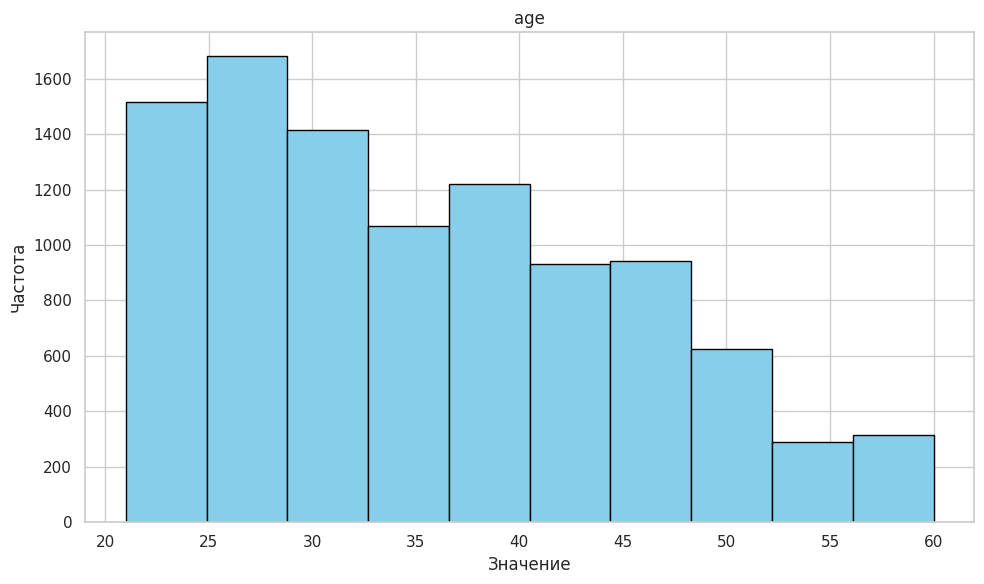

In [21]:
cursor = conn.cursor()

cursor.execute("SELECT employee_id, name, gender, age, education_level FROM employees_common")
employees_common = cursor.fetchall()

df = pd.DataFrame(employees_common, columns=['employee_id', 'name', 'gender', 'age', 'education_level'])
df = df.drop(columns='employee_id')
dv.hist_visualization(pd.DataFrame(df))

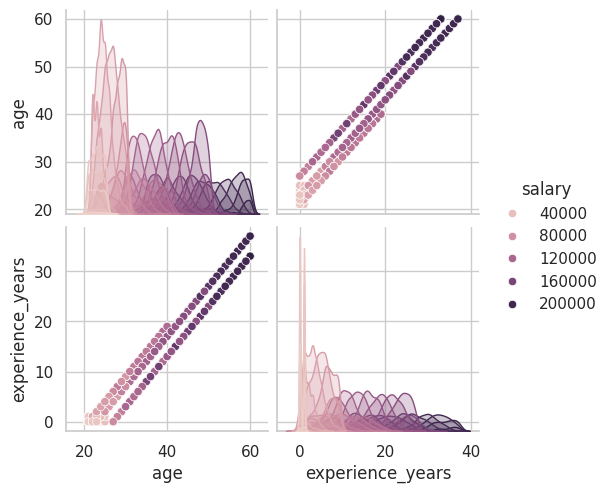

In [22]:
cursor = conn.cursor()

sql_text = """SELECT ec.employee_id,
                     ec.name,
                     ec.gender,
                     ec.age,
                     ec.education_level,
                     ej.department,
                     ej.job_title,
                     ej.experience_years,
                     ej.location,
                     ej.salary
              FROM employees_common ec
              INNER JOIN employees_job ej
                  ON ec.employee_id = ej.employee_id"""

cursor = conn.cursor()
cursor.execute(sql_text)
employees = cursor.fetchall()

df = pd.DataFrame(employees, columns=['employee_id', 'name', 'gender', 'age', 'education_level', 'department', 'job_title', 'experience_years', 'location', 'salary'])
df = df.drop(columns='employee_id')
dv.pairplot_visualization(pd.DataFrame(df), 'salary')

In [23]:
# Закрытие подключения к БД
conn.close()